# Maximum likelyhood estimation analysis 

## Hypotesis
There is a probable flare from Cygnus X-3.

In [88]:
from os.path import join, expandvars
import shutil
from agilepy.api.AGAnalysis import AGAnalysis
from pathlib import Path

## Data

In [90]:
tmin=58884.0
tmax=58886.0
timetype="MJD"
l=79.8
b=0.7
sources_hypotesis = """
15.7017e-08 80.3286 1.12047 2.16619 0 2 _2AGLJ2032+4135 0 0 0 0 0.5 5 20 10000 0 100
16.9737e-08 79.9247 0.661449 1.99734 0 2 CYGX3 0 0 0 0 0.5 5 20 10000 0 100
119.303e-08 78.2375 2.12298 1.75823 3 2 _2AGLJ2021+4029 0 1 3307.63 0 0.5 5 20 10000 0 100
8.30805e-08 76.5566 1.03365 2.60908 0 2 _2AGLJ2020+3824 0 0 0 0 0.5 5 20 10000 0 100
9.97261e-08 81.9171 3.0854 1.92501 0 2 _2AGLJ2029+4403 0 0 0 0 0.5 5 20 10000 0 100
"""
log_index="/AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index"
evt_index="/AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index"

out_dir = expandvars("$HOME/agilepy_analysis/cygnus/output")

work_dir=expandvars("$HOME/agilepy_analysis/cygnus/conf")


if Path(out_dir).exists():
    print("deleting",out_dir)
    shutil.rmtree(out_dir)


Path(work_dir).mkdir(parents=True, exist_ok=True)


print("Working directory:", work_dir)

Working directory: /home/rt/agilepy_analysis/cygnus/conf


The tmin and tmax ISO datas can be converted to MJD or TT with the following web tool: https://tools.ssdc.asi.it/conversionTools

## Configuration file

In [91]:
conf_file_path = join(work_dir,"agilepy_conf.yaml")

In [92]:
conf_file = """
input:
  evtfile: %s
  logfile: %s

output:
  outdir: %s
  filenameprefix: cygnus_analysis
  logfilenameprefix: cygnus_analysis
  verboselvl: 0

selection:
  tmin: %f
  tmax: %f
  timetype: MJD
  glon: %f
  glat: %f
  
"""%(evt_index, log_index, out_dir, tmin, tmax, l, b)

In [93]:
with open(conf_file_path , "w") as cf:
    cf.write(conf_file)

## Sources file

In [94]:
sources_file_path = join(work_dir,"sources.txt")
print(sources_file_path)

/home/rt/agilepy_analysis/cygnus/conf/sources.txt


In [95]:
with open(sources_file_path, "w") as sf:
    sf.write(sources_hypotesis)

## Starting the analysis

In [96]:
aga = AGAnalysis(conf_file_path, sources_file_path)

INFO:File logger:[AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/cygnus/output/logs/cygnus_analysis_20200226-124347.log
DEBUG:File logger:[SourcesLibrary] sourceL 80.328600, sourceB 1.120470, mapCenterL 79.800001, mapCenterB 0.700000
DEBUG:File logger:[SourcesLibrary] 'dist' parameter of '_2AGLJ2032+4135' has been updated from xml: 0.675381
DEBUG:File logger:[SourcesLibrary] Loading source from a Source object..
DEBUG:File logger:[SourcesLibrary] sourceL 79.924700, sourceB 0.661449, mapCenterL 79.800001, mapCenterB 0.700000
DEBUG:File logger:[SourcesLibrary] 'dist' parameter of 'CYGX3' has been updated from xml: 0.130514
DEBUG:File logger:[SourcesLibrary] Loading source from a Source object..
DEBUG:File logger:[SourcesLibrary] sourceL 78.237500, sourceB 2.122980, mapCenterL 79.800001, mapCenterB 0.700000
DEBUG:File logger:[SourcesLibrary] 'dist' parameter of '_2AGLJ2021+4029' has been updated from xml: 2.112978
DEBUG:File logger:[SourcesLibrary]

In [97]:
maplistfile = aga.generateMaps()

DEBUG:File logger:[AGAnalysis] Map generation => fovradmin 0 fovradmax 60 bincenter 30 emin 100 emax 10000 fileNamePrefix EMIN00100_EMAX10000_01 skymapL /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/100_10000.SKY002.SFMG_H0025.disp.conv.sky.gz skymapH /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/100_10000.SKY002.SFMG_H0025.disp.conv.sky.gz
INFO:File logger:[CtsMapGenerator] Science tool called!
DEBUG:File logger:[CtsMapGenerator] Executing command >>cp /home/rt/.conda/envs/agilepy/agiletools/share/AG_ctsmapgen.par ./ 
DEBUG:File logger:[CtsMapGenerator] Executing command >>AG_ctsmapgen /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz /AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index None 40 0.1 79.800001 0.7 180 80 6 5 ARC 507945600.0 508118400.0 100 10000 0 60 
DEBUG:File logger:[CtsMapGenerator] Science tool stdout:

################################################################
### Task AG_ctsmap

DEBUG:File logger:[CtsMapGenerator] Executing command >>rm ./AG_ctsmapgen.par 
INFO:File logger:[AGAnalysis] Science tool ctsMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz']
INFO:File logger:[ExpMapGenerator] Science tool called!
DEBUG:File logger:[ExpMapGenerator] Executing command >>cp /home/rt/.conda/envs/agilepy/agiletools/share/AG_expmapgen.par ./ 
DEBUG:File logger:[ExpMapGenerator] Executing command >>AG_expmapgen /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz /AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/AG_GRID_G0017_SFMG_H0025.sar.gz /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/AG_GRID_G0017_SFMG_H0025.edp.gz None None 40 0.1 79.800001 0.7 180 80 0.5 360 5.0 6 ARC 10.0 160 2.1 507945600.0 508118400.0 100 10000 0 60 
DEBUG:File logger:[ExpMapGenerator] Science tool stdout:


DEBUG:File logger:[ExpMapGenerator] Executing command >>rm ./AG_expmapgen.par 
INFO:File logger:[AGAnalysis] Science tool expMapGenerator produced ['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz']
INFO:File logger:[GasMapGenerator] Science tool called!
DEBUG:File logger:[GasMapGenerator] Executing command >>cp /home/rt/.conda/envs/agilepy/agiletools/share/AG_gasmapgen.par ./ 
DEBUG:File logger:[GasMapGenerator] Executing command >>AG_gasmapgen /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/100_10000.SKY002.SFMG_H0025.disp.conv.sky.gz /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/100_10000.SKY002.SFMG_H0025.disp.conv.sky.gz 
DEBUG:File logger:[GasMapGenerator] Science tool stdout:

##################################

In [98]:
maps = aga.getSkyMaps()
maps

[['/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.cts.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.exp.gz',
  '/home/rt/agilepy_analysis/cygnus/output/maps/cygnus_analysis_EMIN00100_EMAX10000_01.gas.gz']]

In [99]:
cts_map = maps[0][0]
exp_map = maps[0][1]

In [100]:
%matplotlib notebook

INFO:File logger:[PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


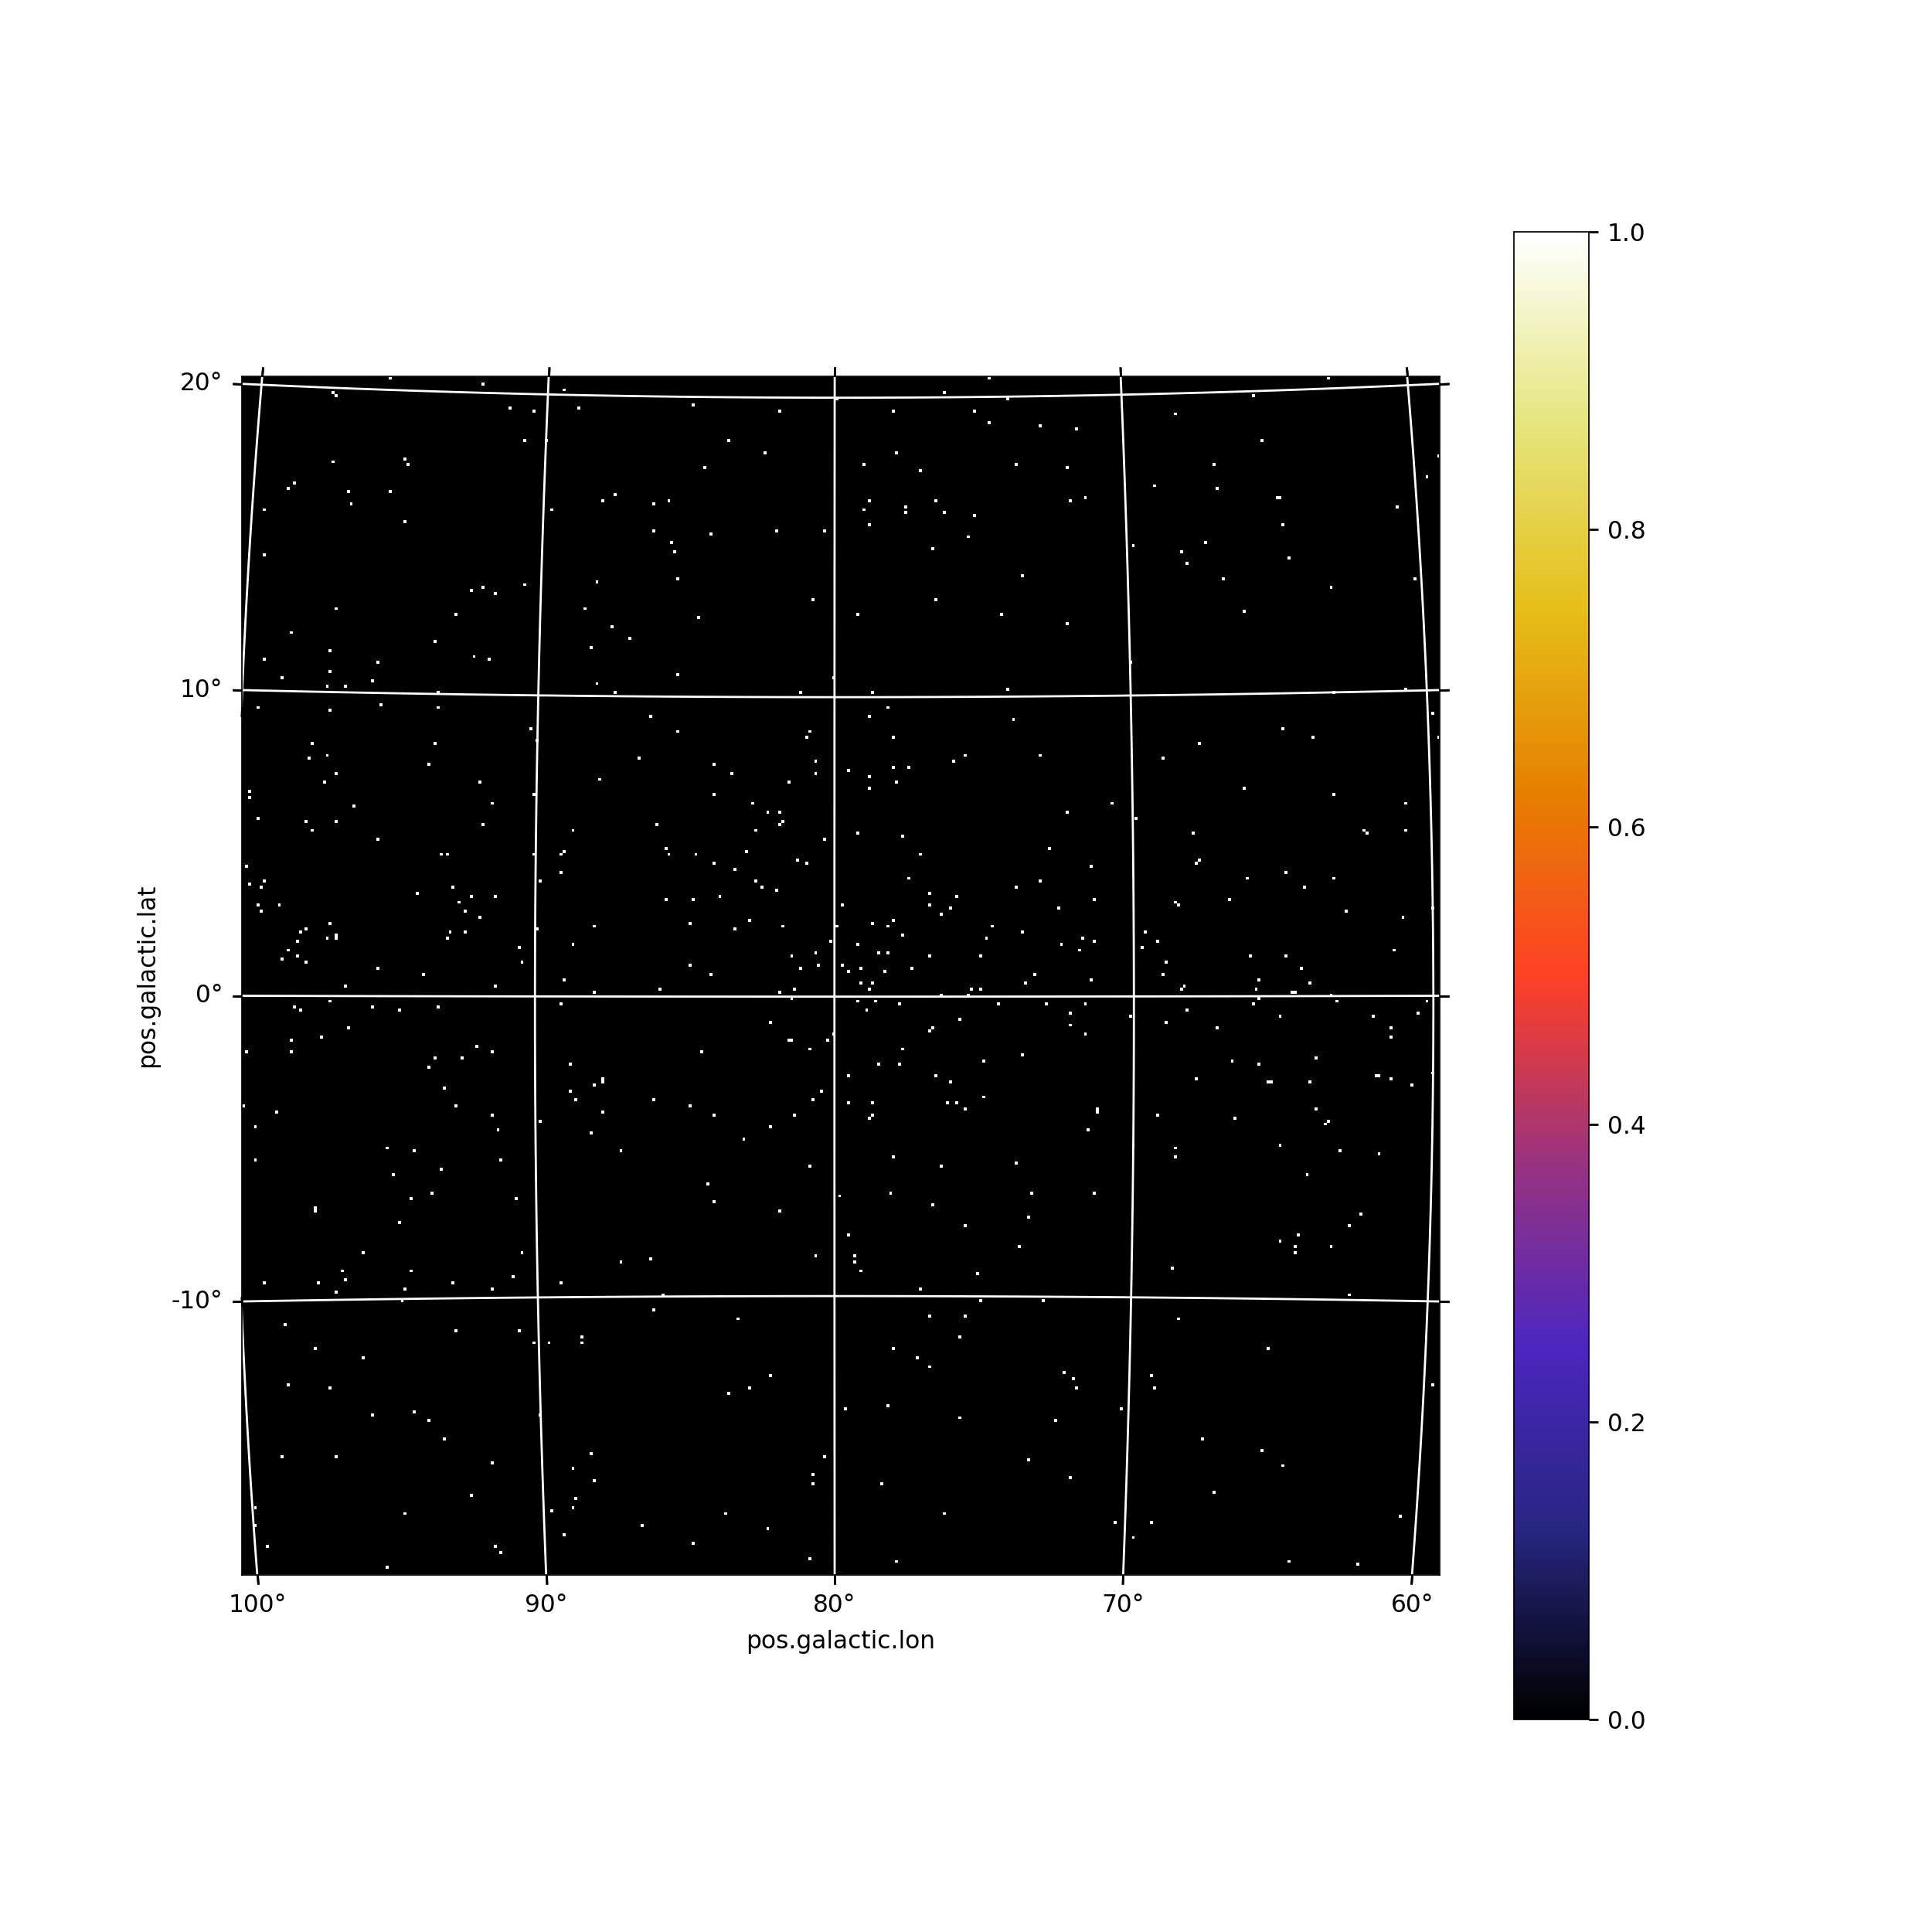

In [101]:
aga.displaySkyMap(cts_map)

INFO:File logger:[PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


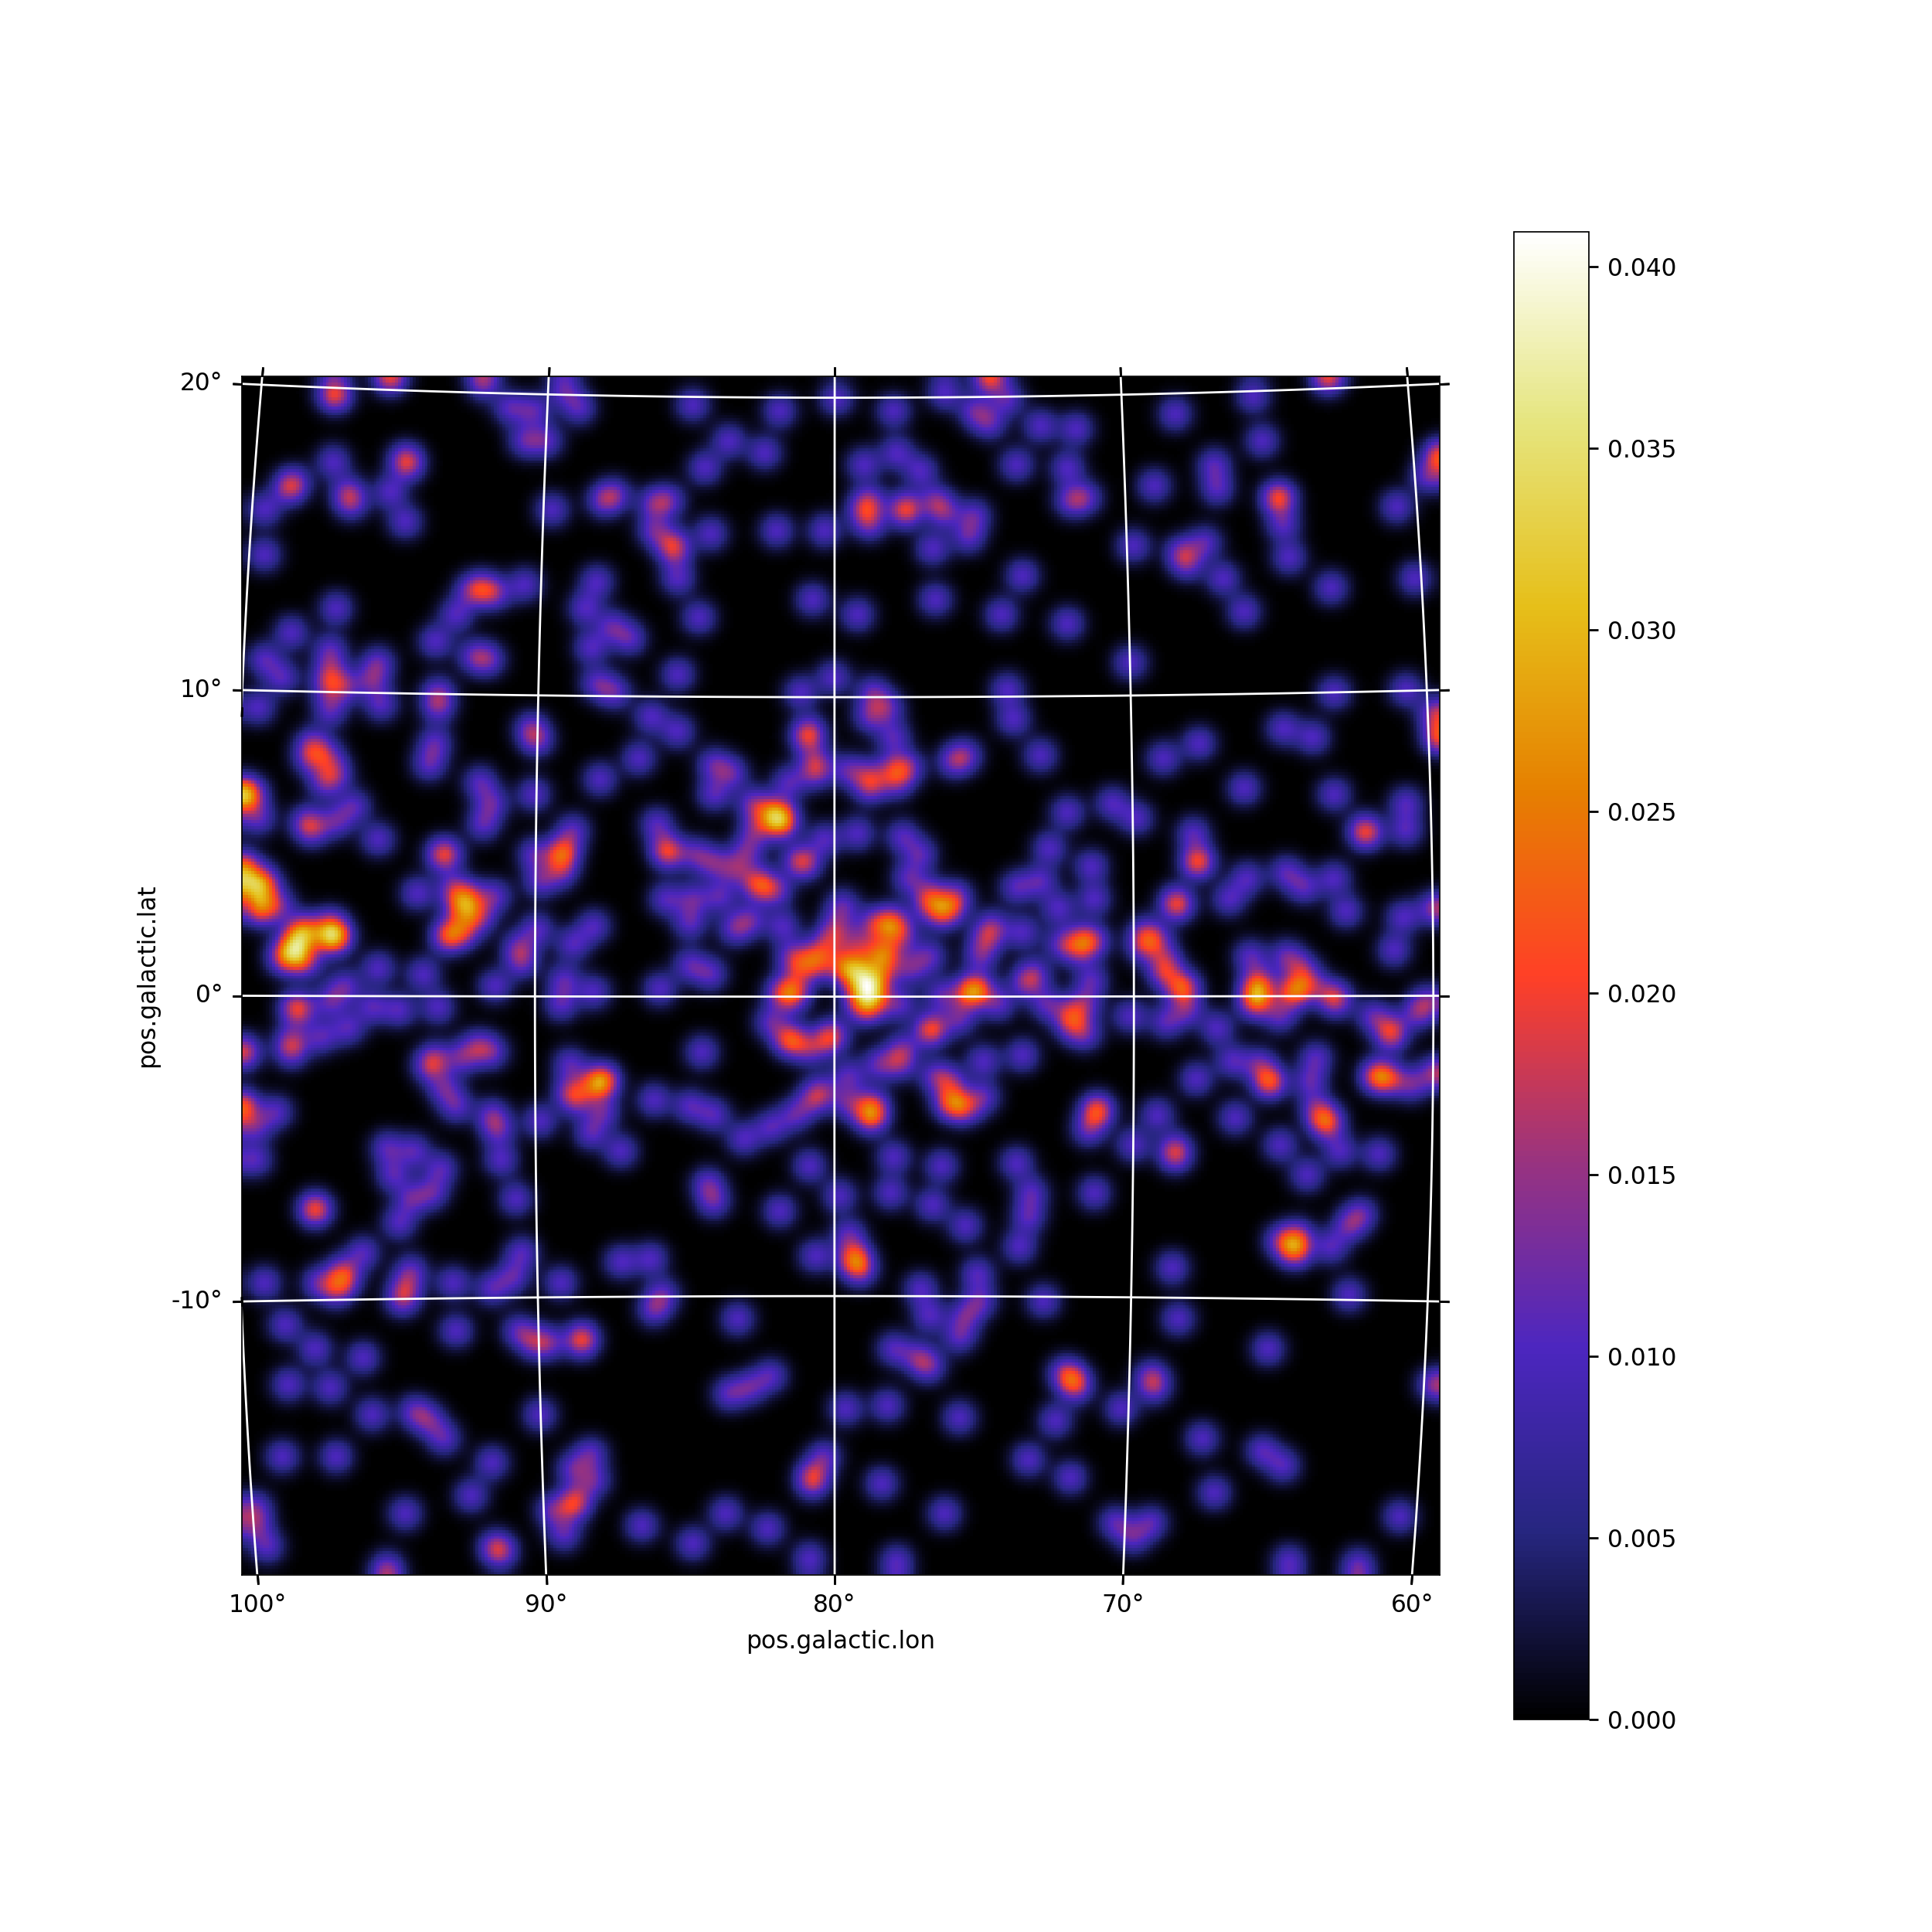

In [102]:
aga.displaySkyMap(cts_map, smooth=3)

INFO:File logger:[PlottingUtils] Plot configuration: 'standard'. fig_width_pt: 426.791340 fontsize:9.000000


<IPython.core.display.Javascript object>


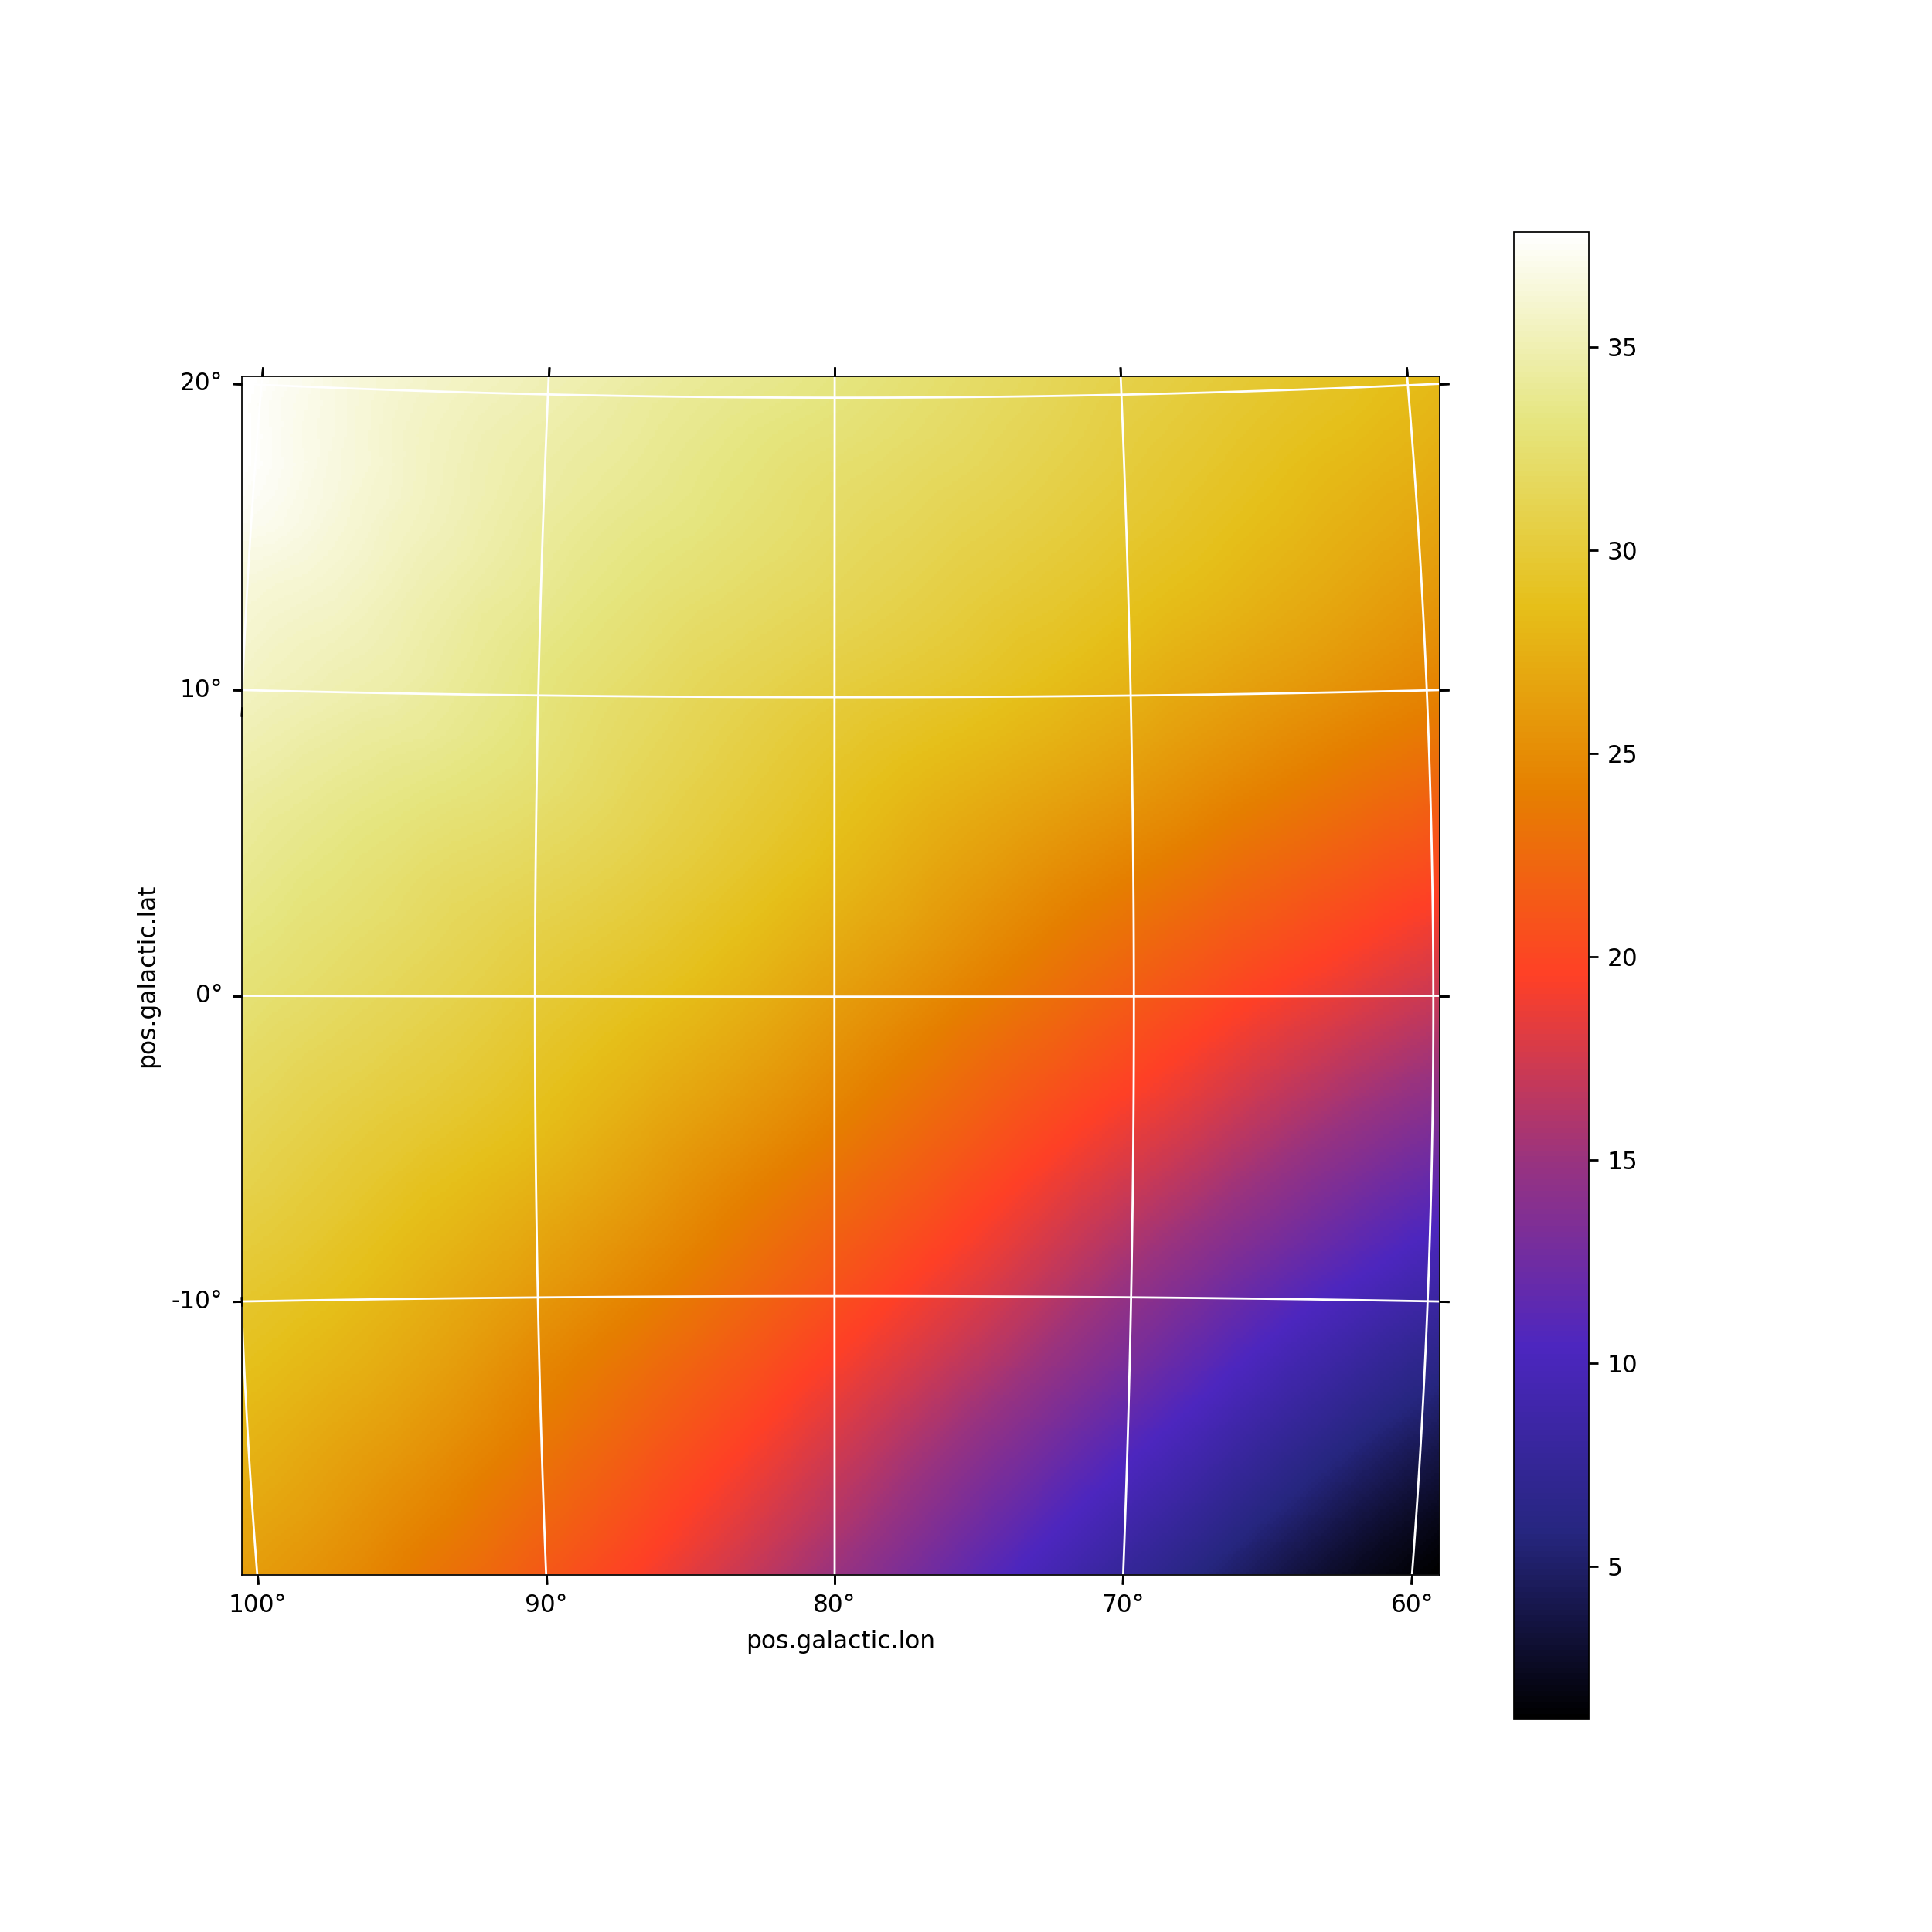

In [103]:
aga.displaySkyMap(exp_map)

In [104]:
aga.mle(maplistfile)

INFO:File logger:[SourcesLibrary] File /home/rt/agilepy_analysis/cygnus/output/sourceLibrary00000.txt has been produced
INFO:File logger:[Multi] Science tool called!
DEBUG:File logger:[Multi] Executing command >>cp /home/rt/.conda/envs/agilepy/agiletools/share/AG_multi.par ./ 
DEBUG:File logger:[Multi] Executing command >>AG_multi /home/rt/agilepy_analysis/cygnus/output/cygnus_analysis.maplist4 /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/AG_GRID_G0017_SFMG_H0025.sar.gz /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/AG_GRID_G0017_SFMG_H0025.edp.gz /home/rt/.conda/envs/agilepy/agiletools/model/scientific_analysis/data/AG_GRID_G0017_SFMG_H0025.psd.gz 10 1 1 /home/rt/agilepy_analysis/cygnus/output/sourceLibrary00000.txt /home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000 2 95 0 0 0 0 0.75 1 Minuit Migrad 2 0.01 1 1 0 15 10 40 
DEBUG:File logger:[Multi] Science tool stdout:

######################################################

DEBUG:File logger:[Multi] Executing command >>rm ./AG_multi.par 
INFO:File logger:[AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2020+3824.source', '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2029+4403.source']
DEBUG:File logger:[SourcesLibrary] Parsing output file of AG_multi: /home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source
DEBUG:File logger:[SourcesLibrary] sourceL 80.328600, sourceB 1.120470, mapCenterL 79.800001, mapCenterB 0.700000
DEBUG:File logger:[SourcesLibrary] 'multiDist' parameter of '_2AGLJ2032+4135' has been updated from multi: 0.675381
DEBUG:File logger:[SourcesLibrary] Parsing output file of AG

['/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2032+4135.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000_CYGX3.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2021+4029.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2020+3824.source',
 '/home/rt/agilepy_analysis/cygnus/output/mle/cygnus_analysis0000__2AGLJ2029+4403.source']

In [106]:
sources = aga.selectSources("sqrtTS > 0")

In [107]:
for s in sources:
    print(s)


-----------------------------------------------------------
Source name: _2AGLJ2021+4029 (PointSource) => sqrt(ts): 2.06086
  * Position:
	- start_pos: (78.2375, 2.12298)
  * Spectrum: (PLExpCutoff)
	- flux: 1.19303e-06
	- index: 1.75823
	- cutoffEnergy: 3307.63
  * Free params: flux pos
  * Multi analysis:
	- flux: 2.37749e-06 +- 1.47336e-06
	- upper limit: 5.89382e-06
	- ergLog: 3.8424e-10 +- 2.38119e-10
	- galCoeff: [0.856963]
	- isoCoeff: [5.7355]
	- L: -1.0
	- B: -1.0
	- distFromStartPos: -1.0
	- r: -1.0
	- a: -1.0
	- b: -1.0
	- phi: -1.0
-----------------------------------------------------------
